In [6]:
# hide
# default_exp model_fitting

from nbdev.showdoc import *

# InstanceCMR - Secondary Baseline
Using the larger dataset from

> Murdock, B. B., & Okada, R. (1970). Interresponse times in single-trial free recall. Journal of Experimental Psychology, 86(2), 263.

## Load Data

In [7]:
from instance_cmr.datasets import prepare_okadata
from instance_cmr.model_fitting import icmr_murd_likelihood
from instance_cmr.model_fitting import icmr_murd_objective_function
from instance_cmr.model_fitting import visualize_fit
from instance_cmr.models import InstanceCMR

murd_trials0, murd_events0, murd_length0 = prepare_okadata(
    '../../data/mo1970.txt')

subject_trial_count = 20 # Each subject gets 20 trials a piece.

murd_events0.head()

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,NaN,True,False,0,False
1,1,1,2,2,NaN,True,False,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Free Echo-Based Sensitivity

In [2]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

In [ ]:
# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0]), 'context_sensitivity': 1, 'feature_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

### Results
```
     fun: 22914.467920046132
     jac: array([-1.16032933e+03, -1.45542435e+02,  8.36815157e+01, -2.05151737e+05,
        2.54963561e+03, -3.36068115e+02, -3.69505872e+01,  0.00000000e+00,
        1.12330672e+03,  5.27335579e+02, -1.94886526e+01])
 message: 'Optimization terminated successfully.'
    nfev: 12975
     nit: 70
 success: True
       x: array([7.47329254e-01, 1.34237703e-02, 9.45611101e-01, 9.28325823e-05,
       8.66088707e-03, 2.86462793e-03, 4.31756924e+00, 7.67665403e+01,
       2.94790531e-02, 3.44894656e-01, 1.51605661e+00])
```

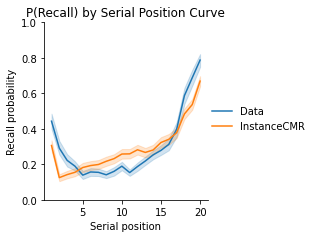

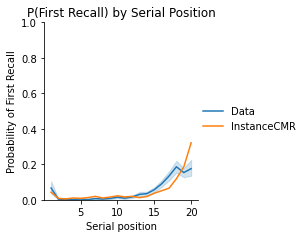

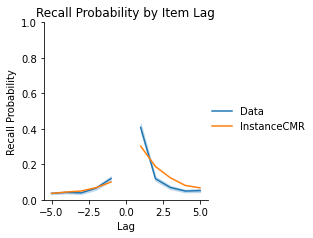

In [4]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'context_sensitivity': 1,
    'feature_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

### Subjectwise

In [3]:
free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

results = []

for subject, start_index in enumerate(range(0, len(murd_trials0), subject_trial_count)):
    print(subject)

    # cost function to be minimized
    # ours scales inversely with the probability that the data could have been 
    # generated using the specified parameters and our model
    cost_function = icmr_murd_objective_function(
        List([murd_trials0[start_index:start_index+subject_trial_count]]), 
        {'item_counts': List([murd_length0]), 'context_sensitivity': 1, 'feature_sensitivity': 1}, 
        free_parameters)

    results.append(differential_evolution(cost_function, bounds, disp=False))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


In [4]:
print([result.fun for result in results])

[305.43085244072836, 238.4647612876656, 329.7025438222279, 336.5242386434903, 348.8882686781923, 303.42052253046273, 257.79028369266376, 287.33568888388504, 231.5204119234239, 357.9344643456218, 181.46051462826142, 319.2786048533236, 387.2531095508502, 269.0830523858128, 293.68963754785653, 334.134695434706, 311.4475440313631, 286.31020238280615, 392.3681016126193, 388.76368100082846, 312.07737509858094, 338.5737868324603, 386.6888610035053, 296.756423054792, 279.7936469713827, 368.5862158821502, 326.02345412972596, 301.3053804139643, 352.71522416157325, 300.5193583950445, 345.4385425182849, 314.78466786099267, 337.051265773251, 386.80861154544766, 312.53360235750336, 382.7372029917884, 300.25468402102683, 331.88057107673205, 239.3717635475779, 234.59159663502876, 208.90610483821902, 272.748917448056, 299.5506347407328, 251.70012354914184, 299.9428794651608, 303.591324441701, 202.14077078708183, 252.26015733005568, 231.4045925400315, 244.99261362739793, 158.86384462279366, 265.63607605

## Free C-F Trace-Based Sensitivity

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'feature_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0]), 'context_sensitivity': 1, 'choice_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

### Results
```
     fun: 22783.36735821076
     jac: array([-2.68966686e+01,  3.48083995e+02, -2.88286900e+02,  4.60773554e+04,
       -1.09364337e+03,  4.73132604e+02,  3.84388843e+00,  2.97222870e+00,
       -3.18458478e+02,  9.11142707e+01,  1.33764844e+01])
 message: 'Optimization terminated successfully.'
    nfev: 12165
     nit: 60
 success: True
       x: array([7.04157544e-01, 2.22044605e-16, 8.42679777e-01, 6.84111237e-04,
       3.31835533e-02, 1.01371142e-02, 4.34918696e+00, 1.43883032e+00,
       2.98134948e-02, 3.42612961e-01, 2.39278982e+00])
```

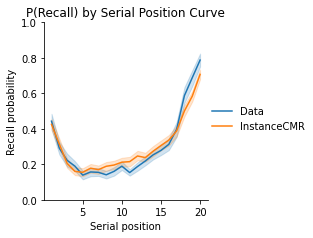

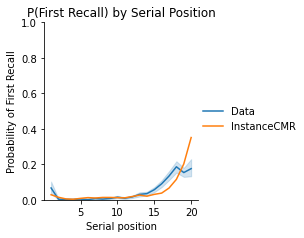

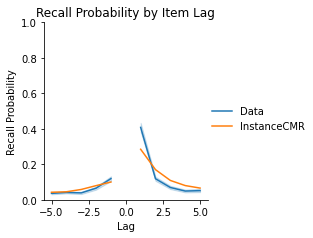

In [6]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'context_sensitivity': 1,
    'choice_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

### Subjectwise

In [9]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'feature_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

results = []

for subject, start_index in enumerate(range(0, len(murd_trials0), subject_trial_count)):
    print(subject)

    # cost function to be minimized
    # ours scales inversely with the probability that the data could have been 
    # generated using the specified parameters and our model
    cost_function = icmr_murd_objective_function(
        List([murd_trials0[start_index:start_index+subject_trial_count]]), 
        {'item_counts': List([murd_length0]), 'context_sensitivity': 1, 'choice_sensitivity': 1}, 
        free_parameters)

    results.append(differential_evolution(cost_function, bounds, disp=False))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


In [10]:
print([result.fun for result in results])

[303.45382418296583, 238.46282645585563, 329.21125249576926, 340.7811041048678, 345.48765769374484, 303.4005617040675, 258.9310252929649, 293.6882226107346, 231.76563732130222, 357.2523991288455, 186.88632375120378, 310.7775820517285, 385.6292758439509, 267.72592564163585, 289.7996584598312, 335.71608798603484, 313.5755924368575, 287.78938575643326, 392.34110369539655, 389.0535098766269, 312.2944074541688, 338.47667227049374, 385.4692131137648, 329.40473609017414, 279.3650104503786, 396.54517272072485, 325.1072920219178, 300.1444907600177, 349.13551822802333, 302.69592407597906, 348.4221946075333, 314.3195986602027, 332.8070501018908, 387.4473068963529, 314.3556297660127, 388.9666145840851, 302.0310839211129, 296.3751514858682, 250.39132722569826, 235.09901213306063, 209.36347314106723, 273.43650907202255, 299.49463007237176, 242.19554109177446, 300.95226972774515, 304.385604442194, 204.5953051690568, 251.57100617324565, 225.2613241648569, 244.7351475213051, 156.74130963480394, 263.795

## Single-Parameter Free Trace-Based Sensitivity

We want to make sure any difference between the trace-based and echo-based sensitivity parameters aren't because the former is responsible for both C->F and F->C transformations. Currently, when feature_sensitivity is held to 1.0, context_sensitivity organizes trace-based retrieval in either direction.

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'context_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0]), 'feature_sensitivity': 1, 'choice_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

### Results
```
     fun: 22850.560383634802
     jac: array([  1.86446413,  -5.81167114,  22.35319687, 802.30311141,
        12.53465599, -33.87795004,  -3.89554738,   0.        ,
        14.05569492, -30.33346731, -42.84738658])
 message: 'Optimization terminated successfully.'
    nfev: 11613
     nit: 60
 success: True
       x: array([8.13747983e-01, 6.27998882e-03, 9.72598264e-01, 9.27475781e-04,
       3.18670579e-01, 3.57189132e-02, 1.03657413e+01, 5.36018883e+01,
       3.16992419e-02, 3.35561099e-01, 9.28861441e-01])
```

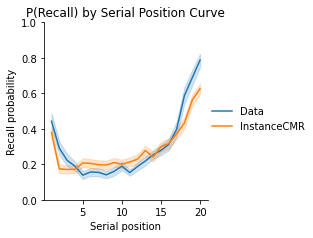

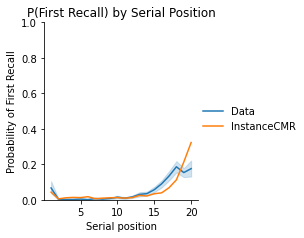

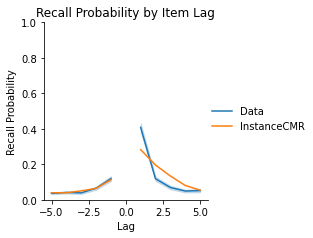

In [8]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'feature_sensitivity': 1,
    'choice_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

### Subjectwise

In [11]:
free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'context_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

results = []

for subject, start_index in enumerate(range(0, len(murd_trials0), subject_trial_count)):
    print(subject)

    # cost function to be minimized
    # ours scales inversely with the probability that the data could have been 
    # generated using the specified parameters and our model
    cost_function = icmr_murd_objective_function(
        List([murd_trials0[start_index:start_index+subject_trial_count]]), 
        {'item_counts': List([murd_length0]), 'feature_sensitivity': 1, 'choice_sensitivity': 1}, 
        free_parameters)

    results.append(differential_evolution(cost_function, bounds, disp=False))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


In [12]:
print([result.fun for result in results])

[304.1492837962723, 238.11938882939262, 330.5131663115768, 336.44728224544065, 349.41726842994876, 312.53146827722725, 337.51448609531076, 287.6268395087693, 231.74552953964962, 356.2829576346587, 186.78852327955062, 313.85632714317353, 386.2456067817088, 269.5281002338953, 306.9576985773913, 335.0796941644478, 313.2325072733741, 288.0938532170716, 392.4344716236275, 388.6550631459827, 312.3326970774226, 336.4992709984682, 392.0633484007093, 298.40465317858525, 279.2788397153214, 368.1967652856482, 326.2291789312814, 298.4745408323163, 349.7436228875689, 303.3196349165347, 340.49153080235385, 314.3771787970444, 335.6554958231367, 386.8993263462754, 313.1052282183267, 388.86259281718344, 300.9041230910331, 295.9761497154199, 240.47232125122736, 235.66718416776428, 211.8685111229628, 273.454854192118, 299.5132143239589, 242.18937193990186, 299.0722564209308, 304.3281147425448, 204.29845720336655, 252.55098800130543, 225.28925966764953, 244.61241061828278, 150.7567967260189, 258.890334005